# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

I would like to know the percentage of number of 4th graders within all stduents. Therefore, I would like to check the missing values of 'GRADES_ALL_G' and 'GRADES_4_G'.

In [4]:
df[['GRADES_ALL_G', 'GRADES_4_G']].isna().sum()

GRADES_ALL_G    83
GRADES_4_G      83
dtype: int64

They have the same number of missing values; might be the same rows.

In [5]:
df[df['GRADES_ALL_G'].isna()][['GRADES_4_G']].notna().any()

GRADES_4_G    False
dtype: bool

In [6]:
df[df['GRADES_ALL_G'].isna()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1632,1990_DODEA,DODEA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,1990_NATIONAL,NATIONAL,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,213.0,263.0,NaN,NaN
1634,1992_DODEA,DODEA,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,1992_NATIONAL,NATIONAL,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,220.0,268.0,217.0,260.0
1636,1994_DODEA,DODEA,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [7]:
df[df['GRADES_ALL_G'].isna()]['AVG_MATH_4_SCORE'].notna().sum()

74

From both the notna().any() check and the subset view of the dataset, we can see these rows are almost entirely missing. However, the Grade 4 Math Score, which we will be interested below, are mostly valid values. Thus, we could not discard the rows.

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [8]:
df.YEAR.nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [9]:
df[(df.STATE == 'MICHIGAN') | (df.STATE == 'OHIO')].groupby('STATE')['AVG_MATH_4_SCORE'].mean()

STATE
MICHIGAN    234.363636
OHIO        239.454545
Name: AVG_MATH_4_SCORE, dtype: float64

Answer: From the previous cell, we can see that Ohio has a higher average Grade 4 Math Score across all year than Michigan.

Find the average for your chosen test across all states in 2019

In [10]:
df['AVG_MATH_4_SCORE'].mean()

236.32743362831857

For each state, find a maximum value for your chosen test score

In [11]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Idea: Would like to create a column of expenditure on grade 4 student. First of all, we examine how well the 'GRADES_ALL_G' represents the sum of the number of all students.

In [12]:
((df['GRADES_ALL_G']-df['GRADES_PK_G']-df['GRADES_1_8_G']-df['GRADES_9_12_G'])/df['GRADES_ALL_G']).describe()

count    1012.000000
mean        0.079086
std         0.013086
min         0.046631
25%         0.072255
50%         0.076135
75%         0.081017
max         0.150394
dtype: float64

The deviation is not large; 'GRADES_ALL_G' is okay to use.

In [13]:
df['TOT_EXPENDITURE_ON_G_4'] = df['TOTAL_EXPENDITURE']/df['GRADES_ALL_G']*df['GRADES_4_G']

Feature engineering justification: the assumption is that the total expenditure spent on 4th graders all correlated to the math score of Grade 4.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

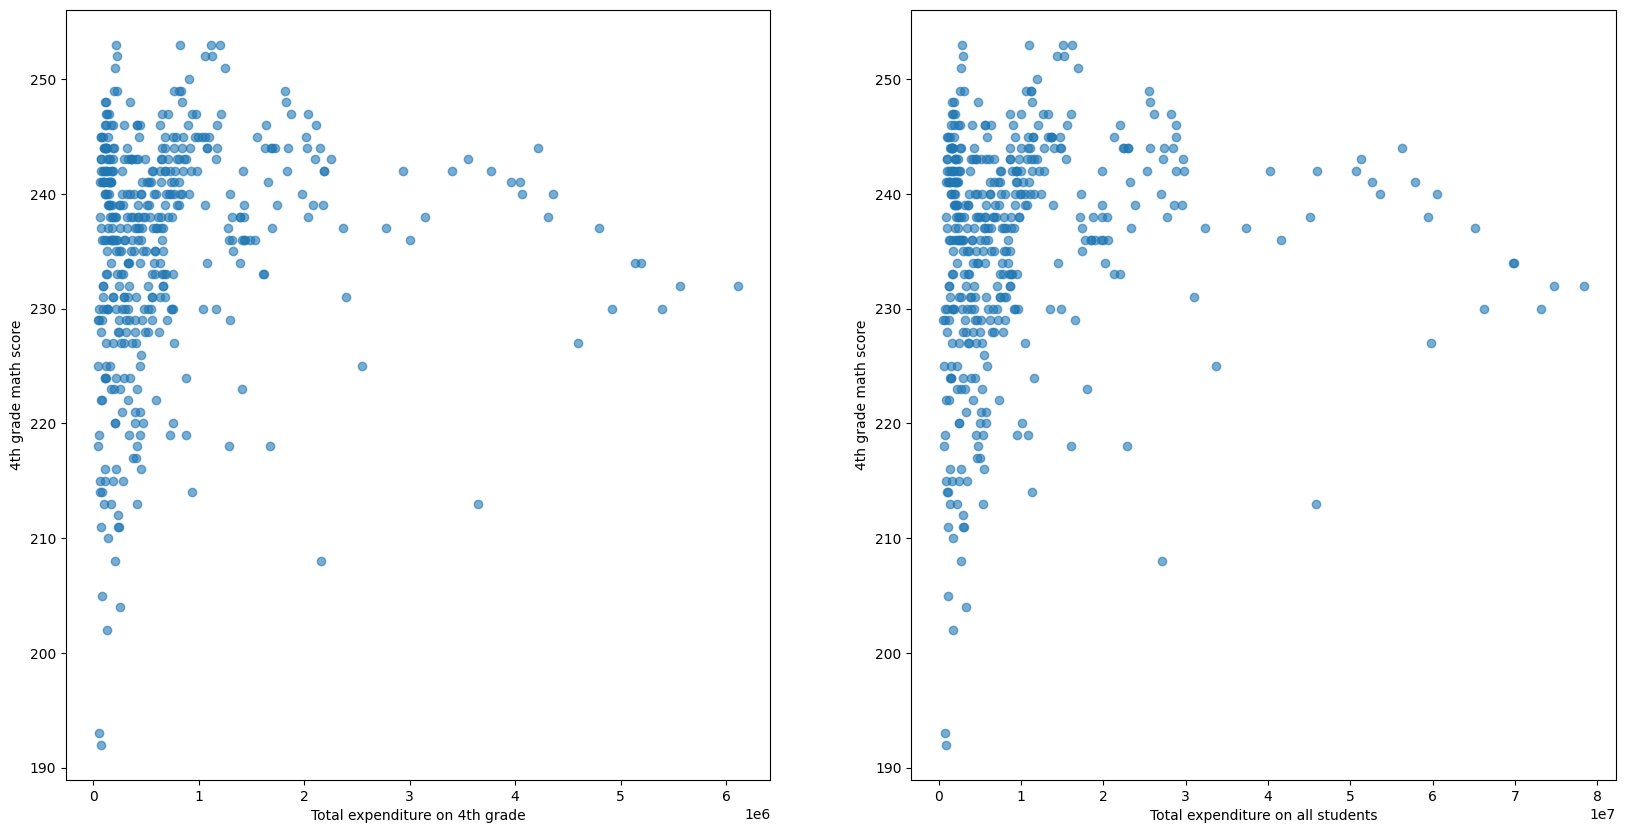

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(data=df, x='TOT_EXPENDITURE_ON_G_4', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Total expenditure on 4th grade')
plt.ylabel('4th grade math score')

plt.subplot(1, 2, 2)
plt.scatter(data=df, x='TOTAL_EXPENDITURE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Total expenditure on all students')
plt.ylabel('4th grade math score')

plt.show()

Opposed to the assumption, both the total expenditure on 4th graders, calculated with the percentage of 4th graders among all students, and the total expenditure on all students have no prominent correlations with the math score of 4th graders. Yet, they have similar patterns.

**Visualization 2**

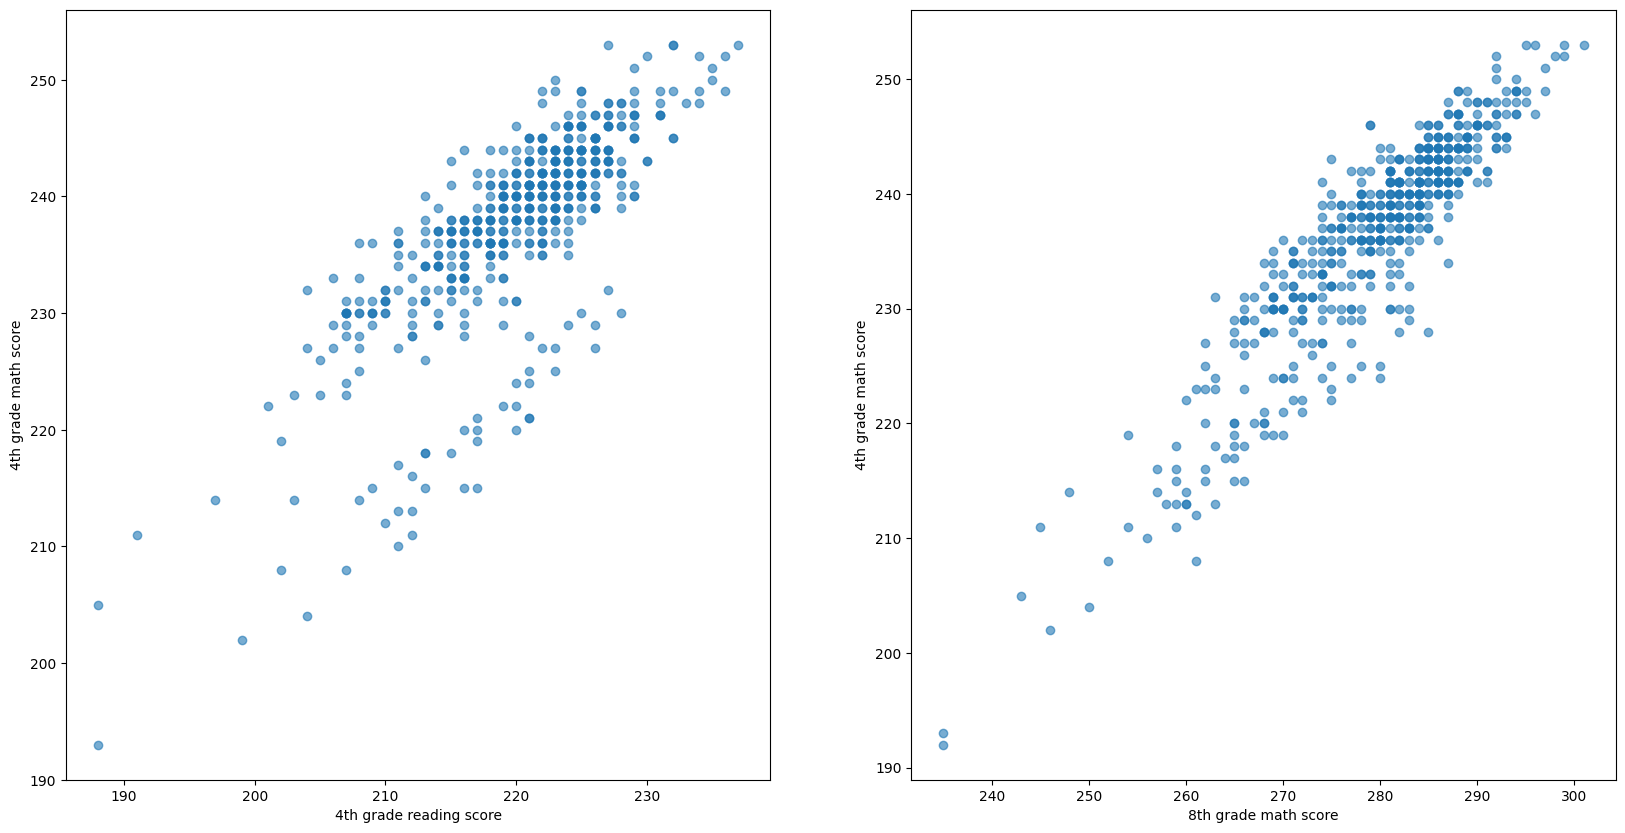

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(data=df, x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th grade reading score')
plt.ylabel('4th grade math score')

plt.subplot(1, 2, 2)
plt.scatter(data=df, x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th grade math score')
plt.ylabel('4th grade math score')

plt.show()

On the other hand, both the reading score of 4th graders and the math score of the 8th graders seem to have a prominent correlation with the math score of 4th graders.

**Visualization 3**

In [16]:
import seaborn as sns

In [17]:
# Would like to plot the states in order of their average grade 4 math score
stateOrder = df.groupby('STATE')['AVG_MATH_4_SCORE'].mean().sort_values(ascending=True).index.tolist()

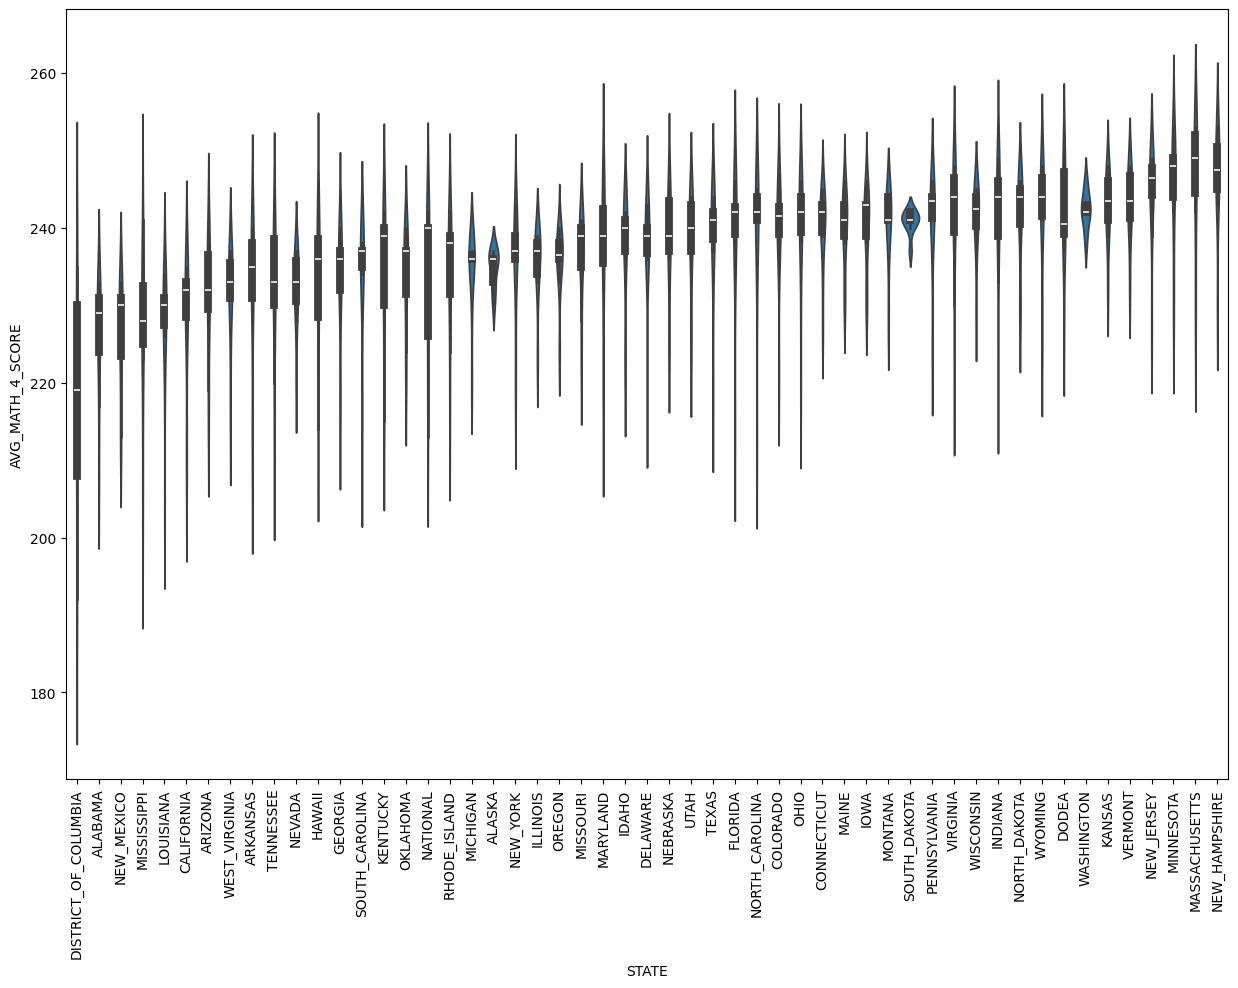

In [18]:
plt.figure(figsize=(15, 10))

sns.violinplot(data=df, x='STATE', y='AVG_MATH_4_SCORE', order=stateOrder)
plt.xticks(rotation=90)
plt.show()

We can arrange different states by the order of average grade 4 math scores but due to the larger standard deviation, 'STATE' still does not seem like a prominently correlated predictor.

**Visualization 4**

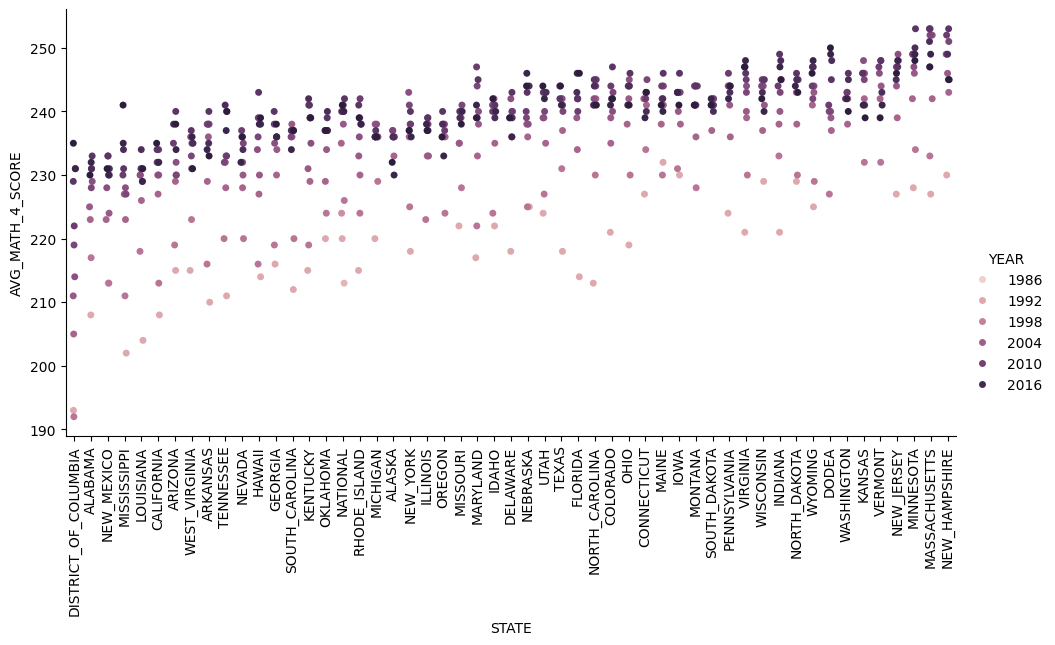

In [19]:
sns.catplot(data=df, x='STATE', y='AVG_MATH_4_SCORE', order=stateOrder, hue='YEAR', aspect=2)
plt.xticks(rotation=90)
plt.show()

With this plot, we can see, for most states, the more recent it is, the higher math score 4th graders have.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[['YEAR', 'TOT_EXPENDITURE_ON_G_4','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=734)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [27]:
model.score(X_test, y_test)

0.9416975408892667

The R^2 score is 0.94

In [28]:
np.mean(np.abs(model.predict(X_test)-y_test))

2.0441249118454095

The root mean squared error is 2.04

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

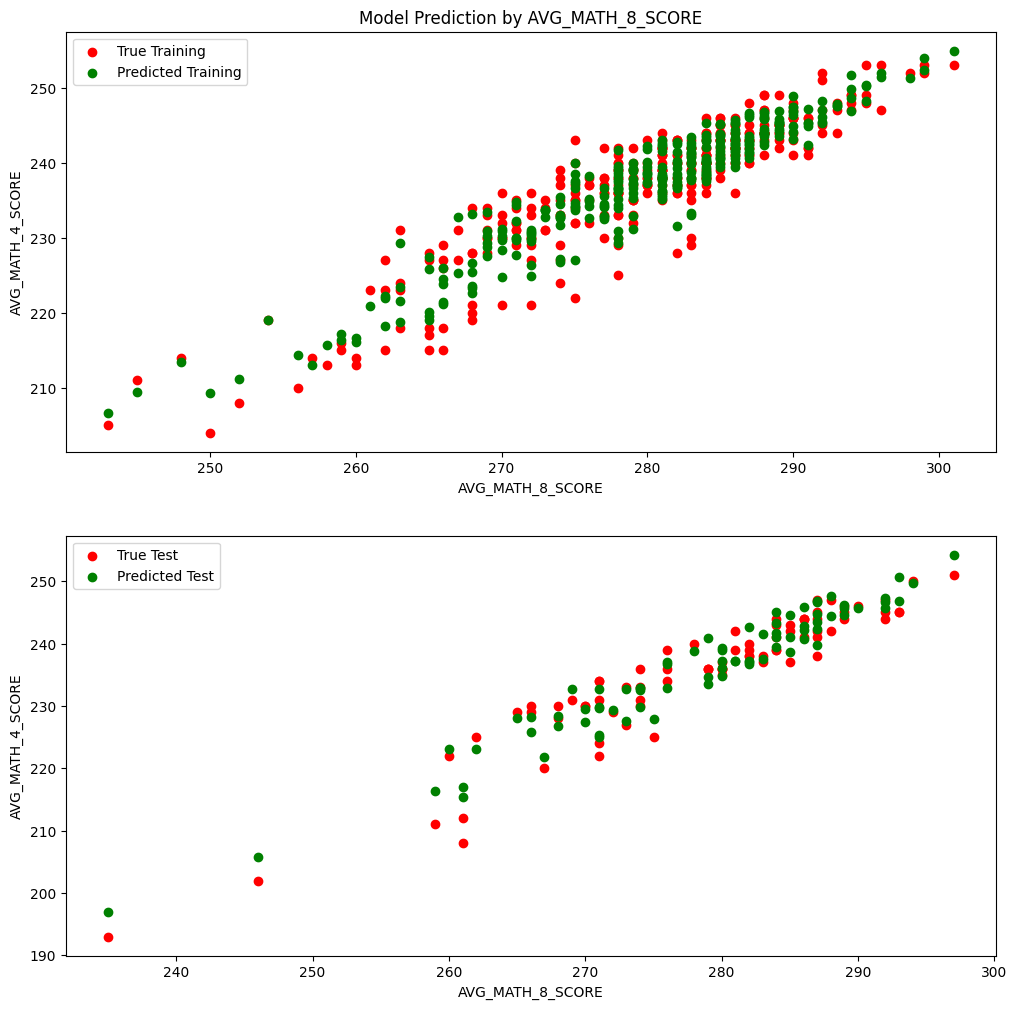

In [37]:
col_name = 'AVG_MATH_8_SCORE'

plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Prediction by AVG_MATH_8_SCORE")

plt.subplot(2, 1, 2)
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Test','Predicted Test'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')


plt.show()

The deviation is not accounted for and the predictions are overall higher.

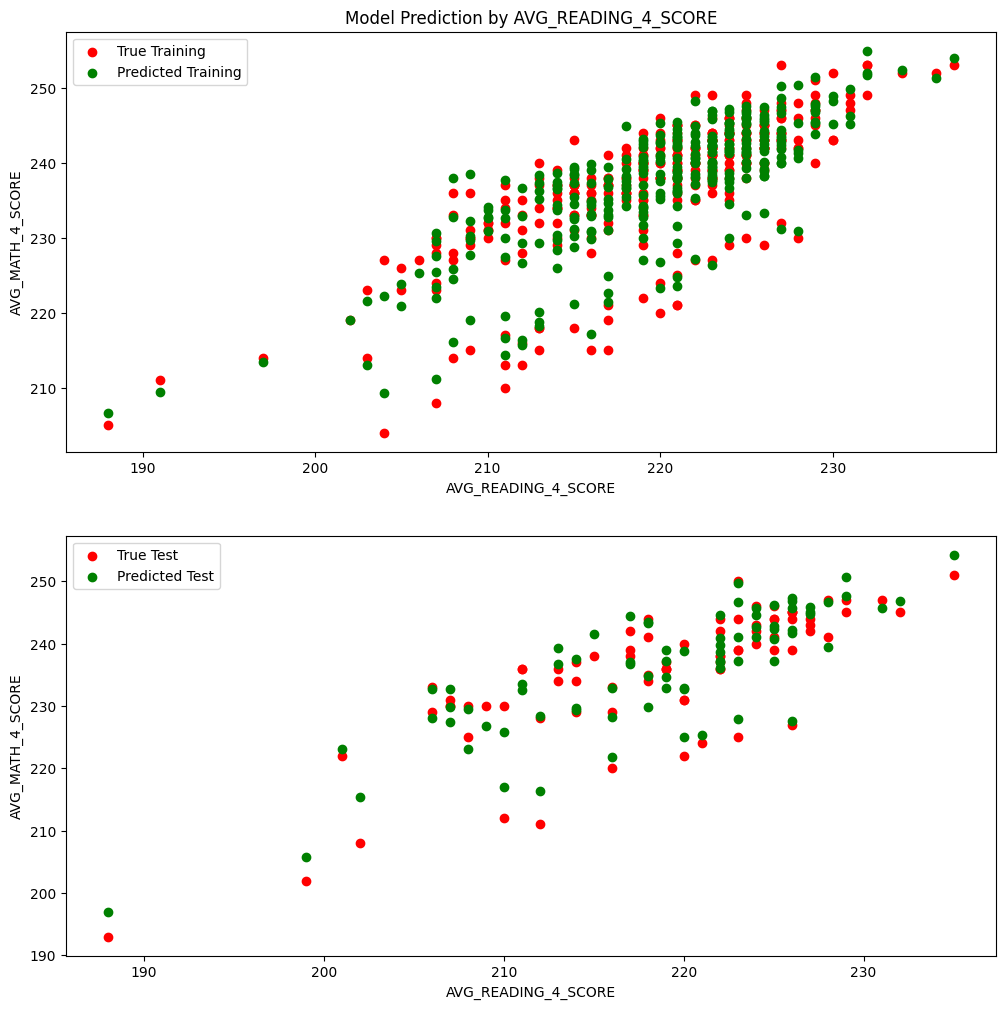

In [36]:
col_name = 'AVG_READING_4_SCORE'

plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Prediction by AVG_READING_4_SCORE")

plt.subplot(2, 1, 2)
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Test','Predicted Test'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')


plt.show()

The distribution is more or less predicted. Still, the predictions are mostly higher.

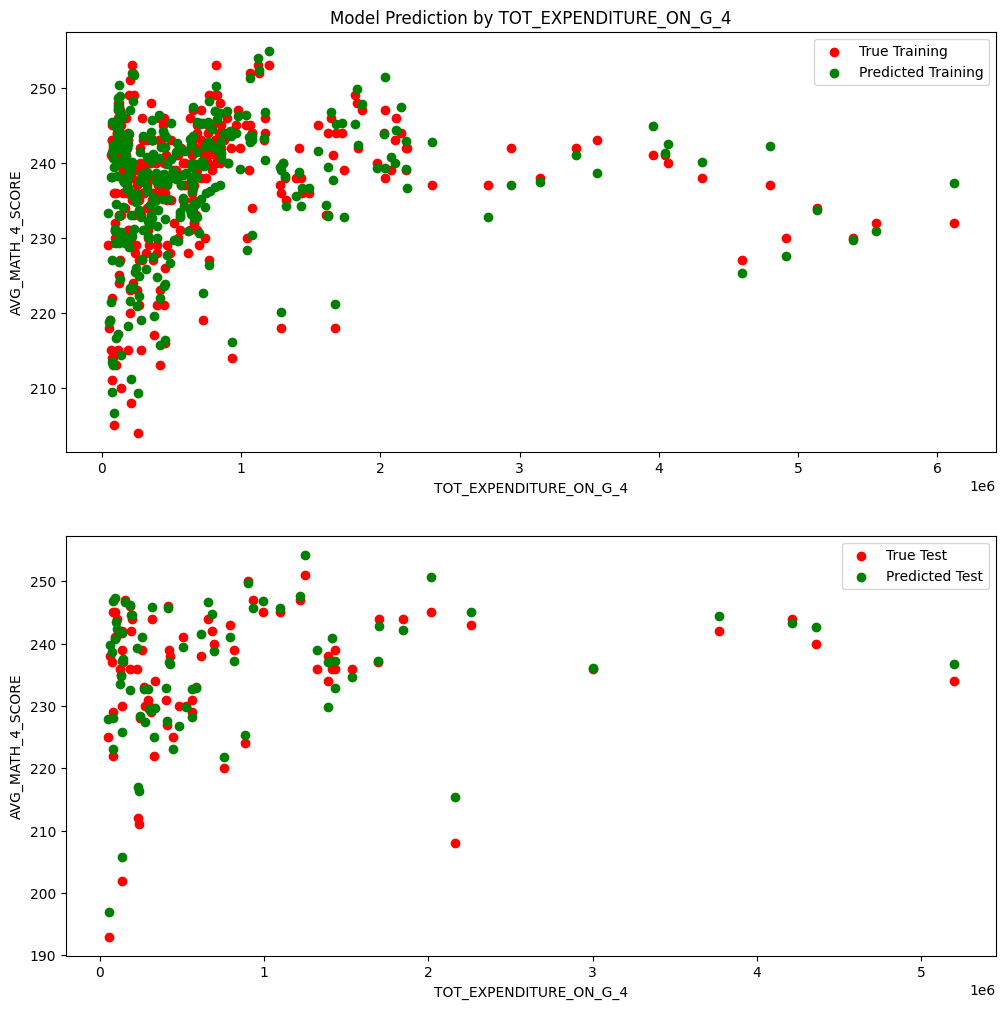

In [35]:
col_name = 'TOT_EXPENDITURE_ON_G_4'

plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Prediction by TOT_EXPENDITURE_ON_G_4")

plt.subplot(2, 1, 2)
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Test','Predicted Test'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')


plt.show()

The distribution is more or less predicted. However, for the test set the predicted and true values are not very close.

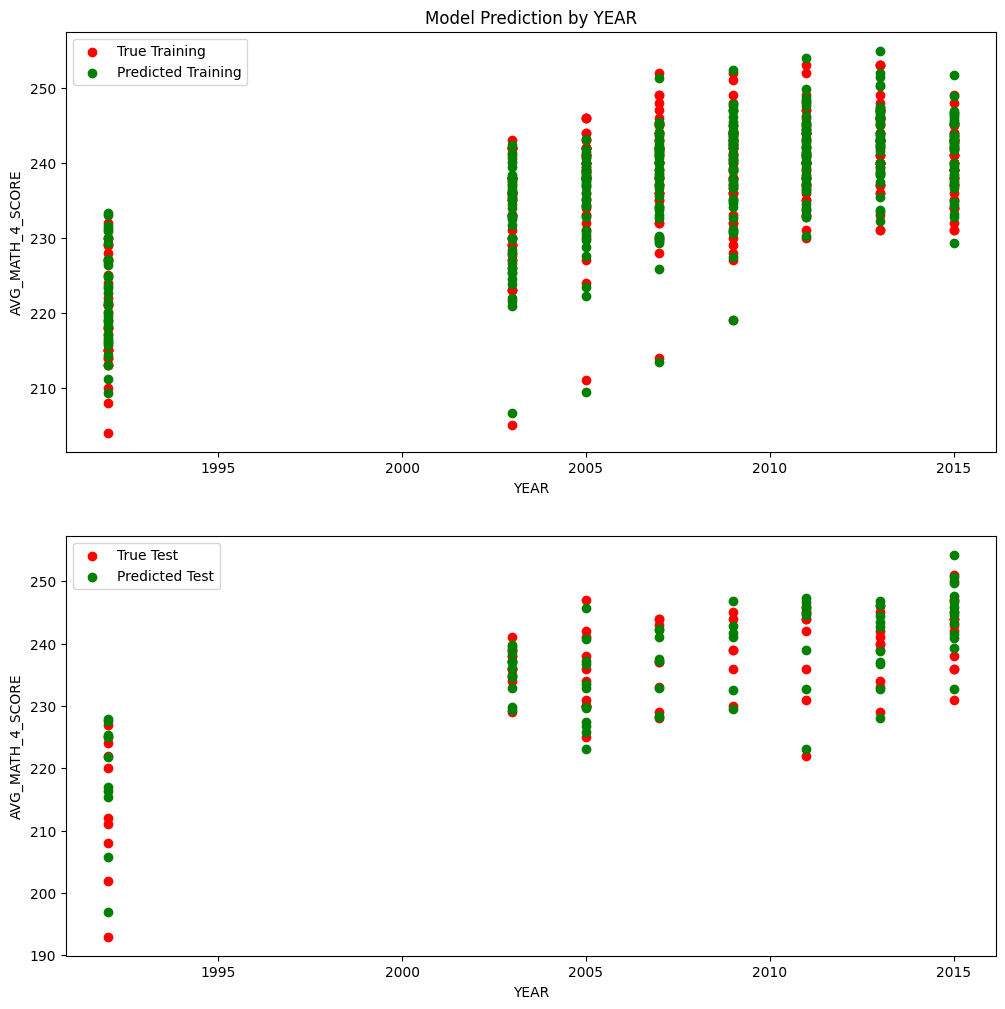

In [34]:
col_name = 'YEAR'

plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Prediction by YEAR")

plt.subplot(2, 1, 2)
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True Test','Predicted Test'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')

plt.show()

The extremes of each year are predicted worse in the training set.